### Strategy to Boost Supermarket Sales in January

As the manager of a supermarket in Surabaya, I find myself at a crossroads as we step into January. The new year has just begun, and I am eager to understand how my supermarket has been performing. My office is filled with stacks of transaction data from our customers, brimming with numbers, percentages, and seemingly endless combinations of products. Yet, I feel lost amidst the overwhelming data.

The challenge is clear: I need **insights on what is truly happening in my supermarket**. What are the purchasing patterns of my customers? Which products are flying off the shelves, and which ones are barely noticed? More importantly, **how can I use this information to optimize the layout of the store and boost sales this year**?

In January, **the store layout is the first thing I want to focus on**. Customers are navigating through the aisles, but I want to ensure they’re being guided to the right places. I wonder: Should I place complementary products closer together? Should I create specific zones to attract customers? For instance, should shampoos be next to toothpaste or near body soaps? Should snacks and drinks be closer together to encourage impulse buys?

The only thing I have right now is the [raw transaction data](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/Supermarket-December-2017.xlsx). It tells me what customers bought, but I need help deciphering it. **Are there certain product combinations that people frequently buy together?** For example, do people who buy detergents also pick up fabric softeners? Do snacks and beverages have a strong pairing trend?

I need your expertise to dig into this data and uncover patterns. Once we understand what products customers often buy together, I can rearrange the store layout to make it more intuitive and appealing. This way, I can improve the shopping experience for my customers while also increasing the chances of cross-selling and boosting sales.

Let’s uncover the story behind the numbers and make data-driven decisions that will set my supermarket up for success in this new year. Help me turn this chaotic dataset into a clear strategy that drives results!

### Grading

1. Understanding the Data (50 points)


*   Key Metrics (0/10/15/25 points): Identifies useful insights, eg: top-selling products, etc.
*   Seasonal Insights (0/10/15/25 points): Explains trends for January, highlighting any seasonal demands or anomalies in customer behavior.
<br>
<br>

2. Recommending Layout Improvements (50 points)

*   Market Basket Analysis Insights (0/10/15/25 points): Uses association rules to determine logical groupings of products.
*   Placement Ideas (0/10/15/25 points): Provides actionable layout changes idea to increase cross-selling opportunities, such as adjusting the location of high-demand complementary items, eg:
If "Shampoo" is frequently bought with "Soap," they should be placed near each other.




In [106]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.dates as mdates

!pip install mlxtend==0.23.1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [107]:
# URL raw file Excel
url = 'https://raw.githubusercontent.com/miguelgunawan/dataset-w2-Data-Mining/main/Supermarket-December-2017.xlsx'

# Load Excel file
df = pd.read_excel(url)

# Menampilkan 5 data teratas dataset
print(df.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  KD_SBR TP_TRN  KDSUP  KAS TRN_DK GDG   GGD  KDSLS      KEL     ITEM  ...  \
0     IN    JUL    NaN  6.0      K   A  AREA    NaN   KERTAS  39390.0  ...   
1     IN    JUL    NaN  6.0      K   A  AREA    NaN  BTL/DOT  13108.0  ...   
2     IN    JUL    NaN  6.0      K   A  AREA    NaN  MUSTIKA   5644.0  ...   
3     IN    JUL    NaN  6.0      K   A  AREA    NaN  SABUN.C   7273.0  ...   
4     IN    JUL    NaN  6.0      K   A  AREA    NaN  LULURMD  12168.0  ...   

  DEP_SWA  GON  KONS POST_STOK STATUS  TP_ADJ USER    TANGGAL       JAM  \
0     NaN  NaN   NaN       NaN    NaN       S  MIA 2017-01-02  08:12:02   
1     NaN  NaN   NaN       NaN    NaN       S  MIA 2017-01-02  08:24:51   
2     NaN  NaN   NaN       NaN    NaN       S  MIA 2017-01-02  08:28:18   
3     NaN  NaN   NaN       NaN    NaN       S  MIA 2017-01-02  08:28:22   
4     NaN  NaN   NaN       NaN    NaN       S  MIA 2017-01-02  08:28:20   

   LAMA_CRD  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       Na

In [108]:
df.info()
# Memberikan infomrasi dari dataset seperti apakah  data  null, apa tipe data dari setiap atribut

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148489 entries, 0 to 148488
Data columns (total 61 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   KD_SBR      148486 non-null  object        
 1   TP_TRN      148486 non-null  object        
 2   KDSUP       40832 non-null   float64       
 3   KAS         136294 non-null  float64       
 4   TRN_DK      148486 non-null  object        
 5   GDG         148486 non-null  object        
 6   GGD         148486 non-null  object        
 7   KDSLS       0 non-null       float64       
 8   KEL         148486 non-null  object        
 9   ITEM        148486 non-null  float64       
 10  NAMA        148486 non-null  object        
 11  BIN         13586 non-null   float64       
 12  KDBIN       0 non-null       float64       
 13  TGL_TRANS   148486 non-null  datetime64[ns]
 14  NO_BKT      148486 non-null  object        
 15  NO_ORD      0 non-null       float64       
 16  ST

In [109]:
df.describe()
# Describe data untuk melihat atribut numerik dari setiap kolom numerik, dimulai dari jumlah (count), rata-rata (mean), standar deviasi (standard deviation), dan setiap kuartil.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,KDSUP,KAS,KDSLS,ITEM,BIN,KDBIN,TGL_TRANS,NO_ORD,SLD_AK,SLD_AKG,...,PTS_GDG,PTS_KEL,PTS_ITEM,QTY_PTS,TGL_OLD,FILLER,SUPPLIER,DEP_SWA,TANGGAL,LAMA_CRD
count,40832.000000,136294.000000,0.0,148486.000000,13586.000000,0.0,148486,0.0,11769.000000,9350.000000,...,0.0,0.0,0.0,0.0,8847,1.484860e+05,7264.000000,1668.000000,148486,37.0
mean,650.873384,4.497381,NaN,21322.181445,8.858531,NaN,2017-01-15 21:02:24.159045376,NaN,20.819228,15.819209,...,NaN,NaN,NaN,NaN,2016-12-07 05:29:26.429297920,1.717615e+11,313.185573,1.182854,2017-01-15 21:34:32.486295296,0.0
min,0.000000,1.000000,NaN,1.000000,1.000000,NaN,2017-01-01 00:00:00,NaN,-12.000000,-12.000000,...,NaN,NaN,NaN,NaN,2013-09-24 00:00:00,1.701010e+11,0.000000,1.000000,2017-01-01 00:00:00,0.0
25%,30.000000,3.000000,NaN,5221.000000,6.000000,NaN,2017-01-07 00:00:00,NaN,0.000000,0.000000,...,NaN,NaN,NaN,NaN,2016-12-01 00:00:00,1.701077e+11,8.000000,1.000000,2017-01-07 00:00:00,0.0
50%,999.000000,5.000000,NaN,13839.000000,8.000000,NaN,2017-01-15 00:00:00,NaN,3.000000,2.000000,...,NaN,NaN,NaN,NaN,2016-12-22 00:00:00,1.701160e+11,69.000000,1.000000,2017-01-16 00:00:00,0.0
75%,999.000000,6.000000,NaN,35802.750000,13.000000,NaN,2017-01-25 00:00:00,NaN,13.000000,11.000000,...,NaN,NaN,NaN,NaN,2017-01-05 00:00:00,1.701251e+11,444.000000,1.000000,2017-01-25 00:00:00,0.0
max,1769.000000,15.000000,NaN,700047.000000,19.000000,NaN,2017-01-31 00:00:00,NaN,2663.000000,1748.000000,...,NaN,NaN,NaN,NaN,2017-01-31 00:00:00,7.013157e+11,1769.000000,2.000000,2017-02-01 00:00:00,0.0
std,467.837803,1.906136,NaN,25881.022963,4.537190,NaN,NaN,NaN,70.033381,54.576439,...,NaN,NaN,NaN,NaN,NaN,2.951083e+10,463.993685,0.386662,NaN,0.0


Cleaning Data

In [110]:
# List columns to drop
columns_to_drop = [
    'KD_SBR', 'TP_TRN', 'KDSUP', 'KAS', 'TRN_DK', 'GDG', 'GGD', 'KDSLS',
    'BIN', 'KDBIN', 'NO_ORD', 'STS_BYR', 'SLD_AK', 'SLD_AKG',
    'HRG_OLD', 'HRGBL_OLD', 'HRG_PKK', 'HRG_JUL', 'DISC', 'DISC1', 'DISC2',
    'JLH_DIS', 'JLH_DIS1', 'JLH_DIS2', 'HRGJL_OLD', 'HRGJL1_OLD', 'HRGJL2_OLD',
    'SUPP_OLD', 'DISB1_OLD', 'DISB2_OLD', 'PPN', 'PPN_OLD', 'PPNBM', 'PPNBM_OLD',
    'KET_TRANS', 'PTS_GDG', 'PTS_KEL', 'PTS_ITEM', 'QTY_PTS', 'TRNBL', 'POST',
    'TGL_OLD', 'FILLER', 'SUPPLIER', 'DEP_SWA', 'GON', 'KONS', 'POST_STOK',
    'STATUS', 'TP_ADJ', 'LAMA_CRD'
]
# Drop the columns
df = df.drop(columns=columns_to_drop)

# Check the remaining columns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148489 entries, 0 to 148488
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   KEL        148486 non-null  object        
 1   ITEM       148486 non-null  float64       
 2   NAMA       148486 non-null  object        
 3   TGL_TRANS  148486 non-null  datetime64[ns]
 4   NO_BKT     148486 non-null  object        
 5   QTY        148486 non-null  float64       
 6   JLH_TRANS  148486 non-null  float64       
 7   USER       148486 non-null  object        
 8   TANGGAL    148486 non-null  datetime64[ns]
 9   JAM        148486 non-null  object        
dtypes: datetime64[ns](2), float64(3), object(5)
memory usage: 11.3+ MB
None


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [111]:
# Check missing values
df.dropna()
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
KEL,3
ITEM,3
NAMA,3
TGL_TRANS,3
NO_BKT,3
QTY,3
JLH_TRANS,3
USER,3
TANGGAL,3
JAM,3


In [130]:
df['TGL_TRANS'] = pd.to_datetime(df['TGL_TRANS'])
df['day'] = df['TGL_TRANS'].dt.day
df['month'] = df['TGL_TRANS'].dt.month
df['year'] = df['TGL_TRANS'].dt.year
df['day_name'] = df['TGL_TRANS'].dt.day_name()
df.head()
# Meng-ekstrak data agar lebih rapi dan siap dianalisa

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,KEL,ITEM,NAMA,TGL_TRANS,NO_BKT,QTY,JLH_TRANS,USER,TANGGAL,JAM,day,month,year,day_name
0,KERTAS,39390.0,KERTAS KADO SINAR DU,2017-01-02,060102001,2.0,2200.0,MIA,2017-01-02,08:12:02,2.0,1.0,2017.0,Monday
1,BTL/DOT,13108.0,PIGEON BTL PP RP 240,2017-01-02,060102002,1.0,23000.0,MIA,2017-01-02,08:24:51,2.0,1.0,2017.0,Monday
2,MUSTIKA,5644.0,MR SEKAR TANJUNG KB,2017-01-02,060102003,1.0,9500.0,MIA,2017-01-02,08:28:18,2.0,1.0,2017.0,Monday
3,SABUN.C,7273.0,BIORE BF 100ML WHITE,2017-01-02,060102003,1.0,6900.0,MIA,2017-01-02,08:28:22,2.0,1.0,2017.0,Monday
4,LULURMD,12168.0,OVALE LULUR BALI BEN,2017-01-02,060102003,1.0,13500.0,MIA,2017-01-02,08:28:20,2.0,1.0,2017.0,Monday


In [113]:
# Menganalisis dan mengagregasi data transaksi berdasarkan bulan dan hari dalam seminggu.
transaction_agg = df.pivot_table(index='month', columns='day_name', values='NO_BKT', aggfunc='count', fill_value=0)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
transaction_agg = transaction_agg[days_order]
transaction_agg

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
month,,,,,,,
1.0,24061,26908,19493,15633,18469,16902,27020


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


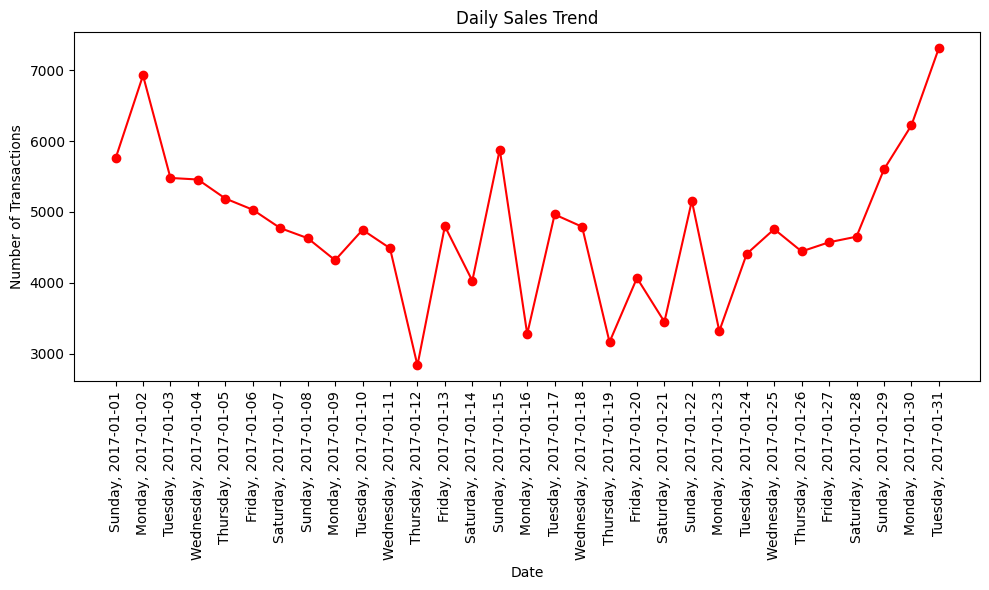

In [114]:
# Visualization: Daily Sales Trend

# Menghitung jumlah transaksi per hari
daily_transactions = df.groupby('TGL_TRANS').size()

# Gabungkan nama hari dan tanggal untuk label sumbu X
daily_transactions.index = pd.to_datetime(daily_transactions.index)
daily_transactions.index = daily_transactions.index.strftime('%A, %Y-%m-%d')  # Format: Nama Hari, Tahun-Bulan-Tanggal

# Plot tren penjualan harian
plt.figure(figsize=(10, 6))
plt.plot(daily_transactions.index, daily_transactions.values, linestyle='-', marker='o', color='r')

# Tambahkan label dan judul
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")

# Rotasi sumbu X untuk tampilan yang lebih baik
plt.xticks(rotation=90)

# Menyesuaikan layout agar tidak terpotong
plt.tight_layout()

# Tampilkan grafik
plt.show()


# Pada awal Januari, penjualan lebih tinggi yang mungkin berhubungan dengan pembelian pasca liburan atau restocking produk.
# Penurunan pada pertengahan bulan dapat menunjukkan penurunan aktivitas belanja setelah periode liburan.
# Peningkatan yang tajam pada akhir bulan, yang mungkin disebabkan oleh faktor musiman atau promosi khusus menjelang akhir bulan atau restock belanja bulanan customer

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


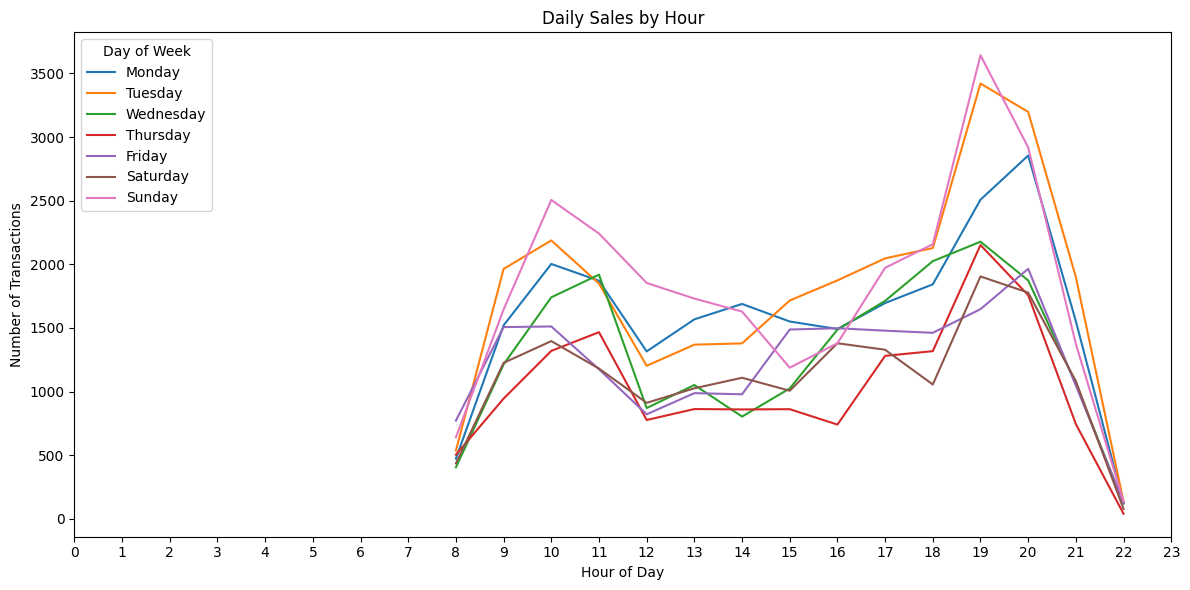

In [134]:
# Visualization: Daily Sales by Hour

# Extract data Jam
df['JAM'] = pd.to_datetime(df['JAM'], format='%H:%M:%S', errors='coerce')

# Extract the hour from the 'JAM' column
df['hour'] = df['JAM'].dt.hour

hour_sales = df.groupby(['day_name', 'hour'])['NO_BKT'].count().reset_index()
hour_sales = hour_sales.pivot(index='hour', columns='day_name', values='NO_BKT').fillna(0)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hour_sales = hour_sales[days_order]
hour_sales.plot(kind='line', figsize=(12, 6))


plt.title('Daily Sales by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(24))
plt.legend(title='Day of Week')
plt.tight_layout()

plt.show()
# Transaksi tertinggi terjadi pada hari Minggu hingga Selasa. Pembelian meningkat pada pukul 9 hingga 11 pagi dan kembali naik pada pukul 19.00 hingga 21.00
# Penjualan sedikit menurun di luar jam-jam tersebut.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


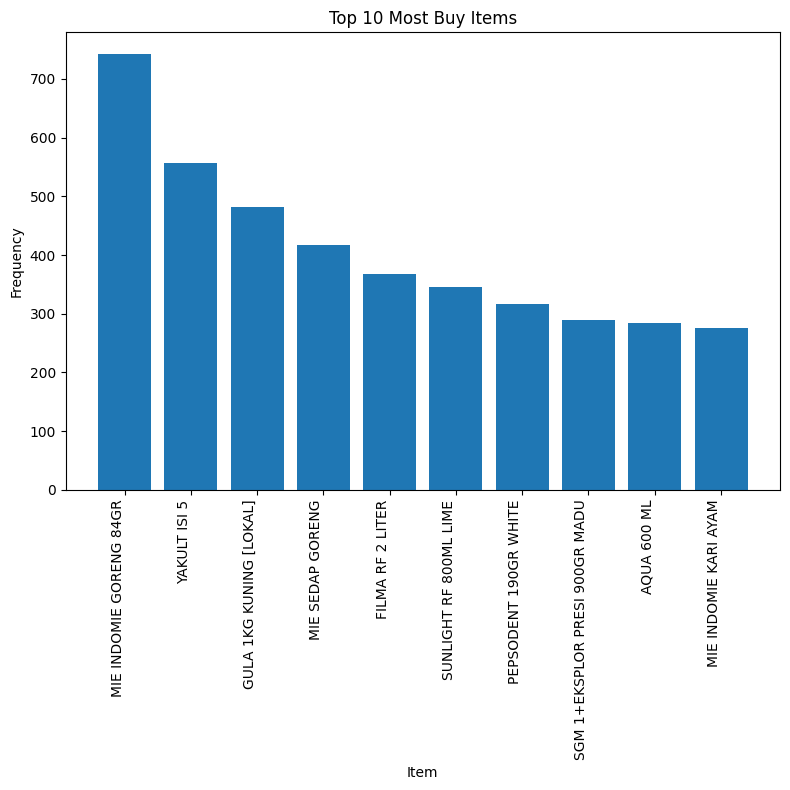

In [129]:
# Visualization: Top 10 Most Buy Items
item_top = df.groupby('NAMA')['NO_BKT'].count().reset_index()
item_top = item_top.rename(columns={'NO_BKT': 'Frequency'})
item_top = item_top.sort_values(by=['Frequency'], ascending=False)

# Create a bar plot for the top 10 most buy items
plt.figure(figsize=(8, 8))
plt.bar(item_top['NAMA'].head(10), item_top['Frequency'].head(10))
plt.xlabel('Item')
plt.ylabel('Frequency')
plt.title('Top 10 Most Buy Items')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

plt.show()

# "Mie Indomie Goreng 84gr" menjadi yang paling banyak dibeli, mencerminkan popularitas mie instan sebagai pilihan makanan yang mudah dan terjangkau.
# Diikuti "Yakult (Isi 5)", yang menunjukkan minat terhadap minuman sehat

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


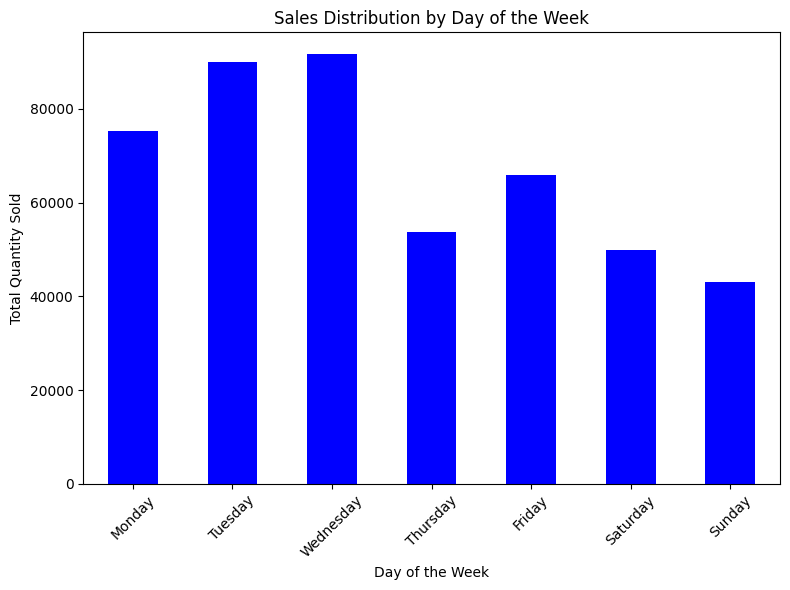

In [128]:
# Visualization: Sales Distribution by Day of the Week
weekday_sales = df.groupby('day_name')['QTY'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
plt.figure(figsize=(8, 6))
weekday_sales.plot(kind='bar', color='blue')
plt.title('Sales Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Penjualan supermarket mencapai angka tertinggi pada hari Senin dan Selasa, dengan angka penjualan yang lebih tinggi daripada hari lainnya.
# Hal ini bisa mengindikasikan pembelian awal minggu yang mungkin terkait dengan pembelian bahan makanan dan kebutuhan rumah tangga untuk memulai minggu baru.

# Penjualan mulai menurun pada hari Rabu dan sangat rendah pada hari Minggu, yang bisa menunjukkan bahwa konsumen cenderung berbelanja lebih sedikit pada hari tersebut
# Penjualan pada hari Kamis dan Jumat masih menunjukkan angka yang cukup konsisten namun lebih rendah dibandingkan dengan awal minggu, orang mulai mengurangi belanja mereka menjelang akhir minggu.

In [123]:
apriori_data = pd.crosstab(df['NO_BKT'], df['KEL'])
apriori_data.head()
# Membuat cross-tabulation antara dua kolom dalam DataFrame dan menghasilkan tabel frekuensi.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KEL,A BABY,A JAHIT,A TULIS,A.AGAR,A.DAPUR,ABON,ACNES,AGENDA,AIR.M,AKANTOR,...,VIVA,WAFER,WAFER.P,WAFERKL,WALLS,WARDAH,WONDERL,WRP,WRP LW,ZWITSAL
NO_BKT,,,,,,,,,,,,,,,,,,,,,
0001/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0002/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0003/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0004/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0005/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [124]:
basket_encoded = apriori_data.applymap(lambda x: 1 if x > 0 else 0)
basket_encoded.head()
# Mengubah tabel frekuensi yang berisi jumlah transaksi menjadi binary encoding

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-124-18aaf985f75e>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded = apriori_data.applymap(lambda x: 1 if x > 0 else 0)


KEL,A BABY,A JAHIT,A TULIS,A.AGAR,A.DAPUR,ABON,ACNES,AGENDA,AIR.M,AKANTOR,...,VIVA,WAFER,WAFER.P,WAFERKL,WALLS,WARDAH,WONDERL,WRP,WRP LW,ZWITSAL
NO_BKT,,,,,,,,,,,,,,,,,,,,,
0001/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0002/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0003/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0004/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0005/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
print("\nAssociation Rules:")
rules
# Menghasilkan association rules


Association Rules:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(SNACK),(BISCPAK),0.068984,0.063600,0.021974,0.318542,5.008515,0.017587,1.374112,0.859642
1,(BISCPAK),(SNACK),0.063600,0.068984,0.021974,0.345509,5.008515,0.017587,1.422504,0.854699
2,(MIE),(DETERJN),0.078878,0.083607,0.023259,0.294872,3.526894,0.016664,1.299612,0.777817
3,(DETERJN),(MIE),0.083607,0.078878,0.023259,0.278195,3.526894,0.016664,1.276137,0.781831
4,(DETERJN),(SOFTENR),0.083607,0.042883,0.027605,0.330173,7.699413,0.024019,1.428902,0.949505
5,(SOFTENR),(DETERJN),0.042883,0.083607,0.027605,0.643722,7.699413,0.024019,2.572131,0.909105
6,(SUSU KT),(DETERJN),0.166503,0.083607,0.023997,0.144123,1.723828,0.010076,1.070707,0.503776
7,(DETERJN),(SUSU KT),0.083607,0.166503,0.023997,0.287022,1.723828,0.010076,1.169036,0.458205
8,(P GIGI),(PAMPERS),0.076227,0.139718,0.020608,0.270348,1.934954,0.009958,1.179030,0.523064
9,(PAMPERS),(P GIGI),0.139718,0.076227,0.020608,0.147496,1.934954,0.009958,1.083600,0.561667


# Seasonal Insight


- Pada bulan Januari, data penjualan supermarket menunjukkan tren yang konsisten, dengan transaksi tertinggi terjadi pada hari Minggu hingga Selasa. Pembelian meningkat pada pukul 9 hingga 11 pagi dan kembali naik pada pukul 19.00 hingga 21.00, sementara penjualan sedikit menurun di luar jam-jam tersebut.

- Bulan Januari sering kali bertepatan dengan periode restocking produk rumah tangga, terutama barang-barang kebersihan pasca liburan. Produk-produk seperti deterjen dan pelembut kain menunjukkan permintaan tinggi, yang dapat dipengaruhi oleh kebiasaan pembersihan setelah liburan. Selain itu, barang-barang perawatan pribadi seperti pasta gigi, sampo, dan sabun menunjukkan pembelian yang stabil, menggambarkan kebutuhan rumah tangga yang berkelanjutan.

- Makanan ringan dan minuman mencerminkan kebiasaan konsumsi yang masih tinggi setelah liburan.

-  Penjualan supermarket mencapai angka tertinggi pada hari Senin dan Selasa, dengan angka penjualan yang lebih tinggi daripada hari lainnya.
Hal ini bisa mengindikasikan pembelian awal minggu yang mungkin terkait dengan pembelian bahan makanan dan kebutuhan rumah tangga untuk memulai minggu baru.

- Penjualan mulai menurun pada hari Rabu dan sangat rendah pada hari Minggu, yang bisa menunjukkan bahwa konsumen cenderung berbelanja lebih sedikit pada hari tersebut

# **- 10 produk terlaris**
- "Mie Indomie Goreng 84gr" menjadi yang paling banyak dibeli, mencerminkan popularitas mie instan sebagai pilihan makanan yang mudah dan terjangkau.

- Produk lain yang mencatatkan permintaan tinggi adalah "Yakult (Isi 5)", yang menunjukkan minat terhadap minuman sehat

- Barang-barang kebutuhan rumah tangga seperti "Gula 1kg Kuning (Lokal)", "Filma RF 2 Liter" (minyak goreng), dan "Sunlight RF 800ml Lime" (cairan pencuci piring). Barang-barang kebersihan seperti "Pepsodent 190gr White" (pasta gigi) dan "SGM 1+ Eksplor Presi 900gr Madu" (susu bubuk) juga termasuk dalam produk yang sering dibeli.

- "Aqua 600ml" menyoroti pentingnya air kemasan

- "Mie Indomie Kari Ayam" mencerminkan preferensi yang terus ada terhadap mie instan.


----------------------------------------------------------------------------

- Produk seperti (SNACK) dan (BISCPAK) sering dibeli bersama dengan confidence yang cukup tinggi (31.8%) dan lift yang sangat tinggi (5.01). Ini menunjukkan bahwa ketika pelanggan membeli SNACK, kemungkinan besar mereka juga akan membeli BISCPAK. Hubungan ini bisa digunakan untuk strategi cross-selling atau bundling produk.

- (SOFTENR) -> (DETERJN) dengan lift yang sangat tinggi (7.70) menunjukkan bahwa produk-produk seperti SOFTENR dan DETERJN cenderung dibeli bersamaan lebih sering.

- (P GIGI, SHAMPOO) -> (SABUN.M) yang memiliki confidence tinggi dan lift yang besar, toko dapat mempertimbangkan untuk menawarkan diskon bundling atau penempatan produk bersama di rak untuk meningkatkan peluang pembelian bersamaan.

# - Kesimpulan
Data transaksi ini mengungkapkan hubungan kuat antara pasangan produk: deterjen dan pelembut kain sering dibeli bersama, mencerminkan sifat saling melengkapi. Sampo, sabun, dan pasta gigi juga menunjukkan keterkaitan yang erat, menunjukkan bahwa mereka sering dibeli dalam satu paket untuk kebutuhan kebersihan. Selain itu, makanan ringan dan biskuit terlihat sering dibeli bersamaan, sesuai dengan kebiasaan ngemil customer.

Dengan seluruh data ini, toko dapat mempertimbangkan strategi apa saja yang bisa digunakan seperti:
- Dengan memahami hari-hari dengan penjualan tertinggi dan terendah, supermarket bisa merencanakan promosi dan penawaran khusus pada hari-hari yang lebih sepi seperti Rabu atau Minggu untuk meningkatkan transaksi.

- Menawarkan diskon bundling atau penempatan produk bersama di rak untuk meningkatkan peluang pembelian bersamaan.